In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime as dt


In [2]:
pax_raw=pd.read_csv("C:/Users/kusha/OneDrive/Desktop/Resume Projects/air-traffic-passenger-statistics.csv/air-traffic-passenger-statistics.csv")

In [3]:
pax=pax_raw.copy()
pax.head()

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count
0,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271
1,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131
2,200507,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415
3,200507,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156
4,200507,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090


In [4]:
pax.dtypes

Activity Period                 int64
Operating Airline              object
Operating Airline IATA Code    object
Published Airline              object
Published Airline IATA Code    object
GEO Summary                    object
GEO Region                     object
Activity Type Code             object
Price Category Code            object
Terminal                       object
Boarding Area                  object
Passenger Count                 int64
dtype: object

In [5]:
nulls=pax.isnull().sum()
nulls

Activity Period                 0
Operating Airline               0
Operating Airline IATA Code    63
Published Airline               0
Published Airline IATA Code    63
GEO Summary                     0
GEO Region                      0
Activity Type Code              0
Price Category Code             0
Terminal                        0
Boarding Area                   0
Passenger Count                 0
dtype: int64

In [6]:
pax['Activity Period']

0        200507
1        200507
2        200507
3        200507
4        200507
          ...  
18880    201806
18881    201806
18882    201806
18883    201806
18884    201806
Name: Activity Period, Length: 18885, dtype: int64

In [7]:
pax.loc[:,'Activity Period']=pd.to_datetime(pax.loc[:,'Activity Period'].astype(str),format='%Y%m')
pax.loc[:,'Year']=pax['Activity Period'].dt.year
pax.loc[:,"Month"]=pax['Activity Period'].dt.month

In [8]:
pax

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Year,Month
0,2005-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,2005,7
1,2005-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,2005,7
2,2005-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,2005,7
3,2005-07-01,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,2005,7
4,2005-07-01,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,2005,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18880,2018-06-01,WOW Air,WW,WOW Air,WW,International,Europe,Enplaned,Other,International,G,50,2018,6
18881,2018-06-01,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Deplaned,Other,International,A,10868,2018,6
18882,2018-06-01,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Enplaned,Other,International,A,11664,2018,6
18883,2018-06-01,XL Airways France,SE,XL Airways France,SE,International,Europe,Deplaned,Other,International,A,804,2018,6


In [9]:
time_begin=pax.loc[:,'Activity Period'].min()
time_end=pax.loc[:,'Activity Period'].max()
time_range=time_end-time_begin
print("End Date=",str(time_end)[:11])

End Date= 2018-06-01 


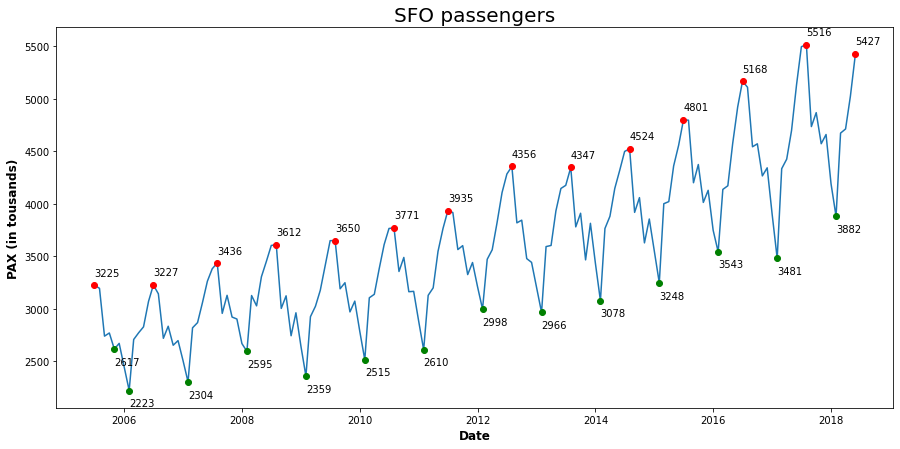

In [10]:
pax_yr=pax.groupby(['Activity Period'])['Passenger Count'].sum().divide(1000)
fig,ax=plt.subplots(figsize=(15,7))
sns.lineplot(x=pax_yr.index,y=pax_yr.values,markers=True,ax=ax,zorder=0)



# max pax for each year
pax_yr_max=pax_yr.groupby(pax_yr.index.year).max()


# to understand--------------------------
pax_yr_max_complete=pax_yr[pax_yr.isin(pax_yr_max.values)].to_frame()


plt.scatter(pax_yr_max_complete.index,pax_yr_max_complete.values,color='red',zorder=2)

# annotating each marker
for t,v in pax_yr_max_complete.reset_index().values:
    ax.text(t,v+90,int(v))










pax_yr_min=pax_yr.groupby(pax_yr.index.year).min()


# to understand--------------------------
pax_yr_min_complete=pax_yr[pax_yr.isin(pax_yr_min.values)].to_frame()


plt.scatter(pax_yr_min_complete.index,pax_yr_min_complete.values,color='green',zorder=2)

# annotating each marker
for t,v in pax_yr_min_complete.reset_index().values:
    ax.text(t,v-150,int(v))



plt.title("SFO passengers", size = 20)
plt.xlabel("Date", fontweight="bold", size = 12)
plt.ylabel("PAX (in tousands)", fontweight="bold", size = 12)
plt.show()




#The number of passengers is generally increasing (trend) with a clear seasonal pattern with a period of about one year. The traffic peak is around summertime while the lowest traffic is during wintertime at the beginning of the year. The heatmap below shows what amount of traffic various airlines generated through the years (in thousands).

In [11]:
pax_airline_yr=pax.groupby(['Year','Operating Airline'])['Passenger Count'].sum().divide(1000)
pax_airline_yr=pax_airline_yr.reset_index()


pivot_1=pax_airline_yr.pivot_table(values='Passenger Count',index='Operating Airline',columns='Year',fill_value=0)

# dropping small airlines
smallest_airlines=pivot_1[pivot_1.sum(axis=1)<13]


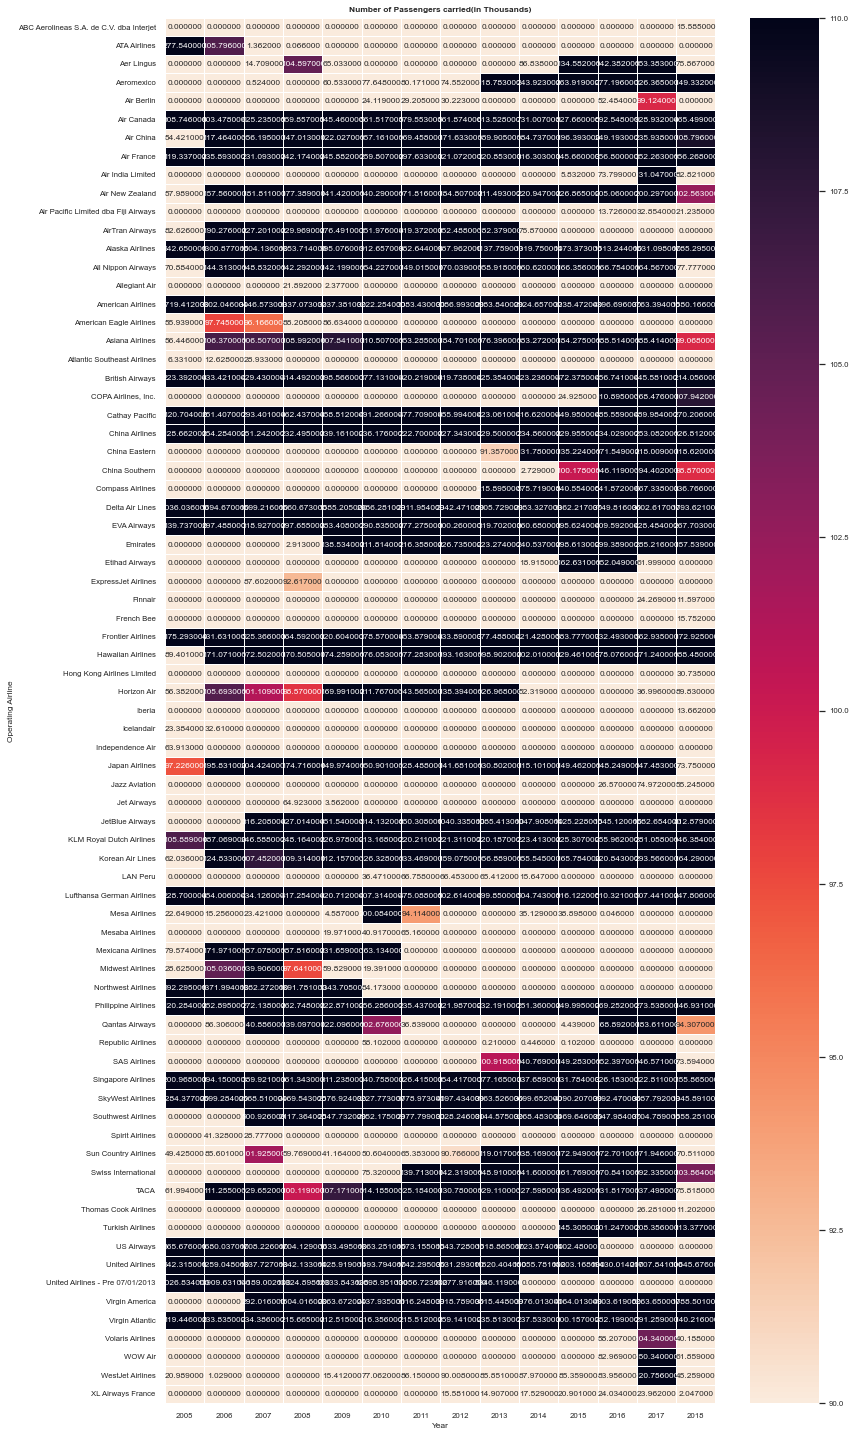

In [12]:
smallest_airlines=pivot_1[pivot_1.sum(axis=1)<13]
pivot_1=pivot_1.drop(smallest_airlines.index,axis=0)

sns.set(font_scale=.7)
fig1=plt.figure(figsize=(12,20))
p1=sns.heatmap(pivot_1,annot=True,linewidths=0.5,vmin=100,vmax=100,fmt='0f',cmap=sns.cm.rocket_r)
p1.set_title("Number of Passengers carried(in Thousands)",fontweight='bold')
p1.set_yticklabels(p1.get_yticklabels(),rotation=0)
plt.tight_layout()
plt.show()



In [13]:
avg_airline=pivot_1.mean(axis=1)
avg_airline

Operating Airline
ABC Aerolineas S.A. de C.V. dba Interjet      1.113214
ATA Airlines                                 27.483143
Aer Lingus                                   55.549357
Aeromexico                                  119.496143
Air Berlin                                   16.796786
                                               ...    
Virgin Atlantic                             228.145214
Volaris Airlines                             14.481071
WOW Air                                      21.083429
WestJet Airlines                             57.128643
XL Airways France                             8.497214
Length: 75, dtype: float64

In [14]:
top5_airline=avg_airline.nlargest(5).to_frame().mul(1000)
top5_airline.columns=['Mean no of Passengers per year']
sum_of_all=top5_airline.loc[:,"Mean no of Passengers per year"].sum()
top5_airline.loc[:,"share %"]=top5_airline.loc[:,"Mean no of Passengers per year"].div(sum_of_all).mul(100).round(1)
top5_airline


,Mean no of Passengers per year,share %
Operating Airline,,
United Airlines,8.045743e+06,32.7
United Airlines - Pre 07/01/2013,7.525994e+06,30.6
SkyWest Airlines,3.184454e+06,13.0
American Airlines,3.115885e+06,12.7
Virgin America,2.703137e+06,11.0


In [15]:
pax

,Activity Period,Operating Airline,Operating Airline IATA Code,Published Airline,Published Airline IATA Code,GEO Summary,GEO Region,Activity Type Code,Price Category Code,Terminal,Boarding Area,Passenger Count,Year,Month
0,2005-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Deplaned,Low Fare,Terminal 1,B,27271,2005,7
1,2005-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Enplaned,Low Fare,Terminal 1,B,29131,2005,7
2,2005-07-01,ATA Airlines,TZ,ATA Airlines,TZ,Domestic,US,Thru / Transit,Low Fare,Terminal 1,B,5415,2005,7
3,2005-07-01,Air Canada,AC,Air Canada,AC,International,Canada,Deplaned,Other,Terminal 1,B,35156,2005,7
4,2005-07-01,Air Canada,AC,Air Canada,AC,International,Canada,Enplaned,Other,Terminal 1,B,34090,2005,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18880,2018-06-01,WOW Air,WW,WOW Air,WW,International,Europe,Enplaned,Other,International,G,50,2018,6
18881,2018-06-01,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Deplaned,Other,International,A,10868,2018,6
18882,2018-06-01,WestJet Airlines,WS,WestJet Airlines,WS,International,Canada,Enplaned,Other,International,A,11664,2018,6
18883,2018-06-01,XL Airways France,SE,XL Airways France,SE,International,Europe,Deplaned,Other,International,A,804,2018,6


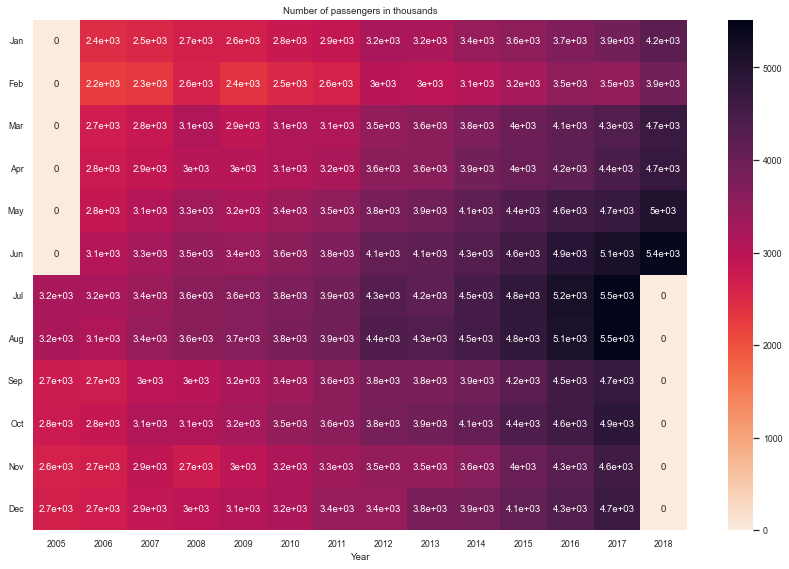

In [16]:
pax_month_yr=pax.groupby(['Year','Month'])['Passenger Count'].sum().divide(1000).round()
pax_month_yr=pax_month_yr.reset_index()
pax_month_yr

pivot_2=pax_month_yr.pivot_table(values='Passenger Count',index='Month',columns='Year',fill_value=0)
pivot_2.index=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]

sns.set(font_scale=0.8)
fig=plt.figure(figsize=(12,8))
g=sns.heatmap(pivot_2,annot=True,cmap=sns.cm.rocket_r)
g.set_title("Number of passengers in thousands")
g.set_yticklabels(g.get_yticklabels(),rotation=0)
plt.tight_layout()
plt.show()


In [17]:
bbb=pax.groupby(["Year","GEO Region"])["Passenger Count"].sum()
bbb=bbb.reset_index()

pivot_5=bbb.pivot_table(values='Passenger Count',index='Year',columns='GEO Region',fill_value=0)
pivot_5=pivot_5.drop("US",axis=1)
pivot_5['Total']=pivot_5.sum(axis=1)

In [18]:
pivot_5

GEO Region,Asia,Australia / Oceania,Canada,Central America,Europe,Mexico,Middle East,South America,Total
Year,,,,,,,,,
2005,1955732,164991,589467,61994,1147195,305087,0,0,4224466
2006,3978377,453420,1194203,111255,2163664,686118,0,0,8587037
2007,4207750,513077,1289020,129652,2294460,636946,0,0,9070905
2008,4199816,489532,1239889,100119,2359832,641005,2913,0,9033106
2009,3689124,478969,1158107,107171,2187690,599886,138534,0,8359481
2010,4017794,455466,1301702,114185,2163987,595388,211814,36471,8896807
2011,3944720,416924,1284852,125184,2415764,585198,216358,66758,9055758
2012,4119766,396782,1257499,130780,2514619,850434,226735,66453,9563068
2013,4054984,431219,1286553,129110,2719687,834049,223274,65412,9744288


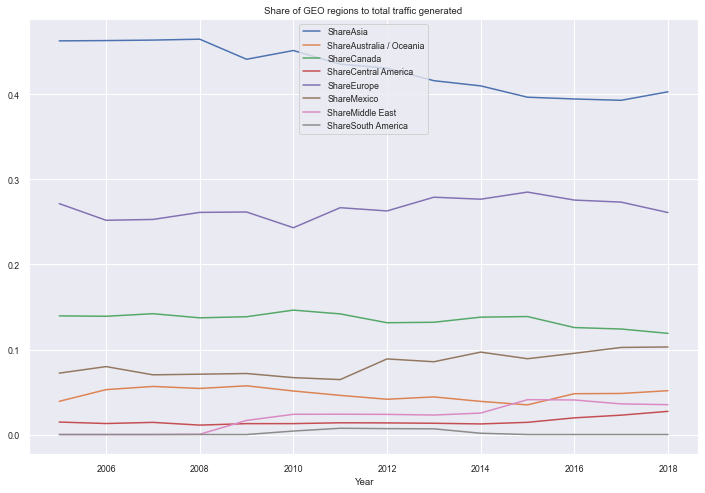

In [19]:
for col in pivot_5.columns[:-1]:
    pivot_5["Share"+str(col)]=pivot_5[col]/pivot_5['Total']
    

ratios_5 = pivot_5.iloc[:,-8:]
ratios_5.plot(figsize=(12,8), title="Share of GEO regions to total traffic generated")
plt.legend(loc='best')
plt.show()    
    
    


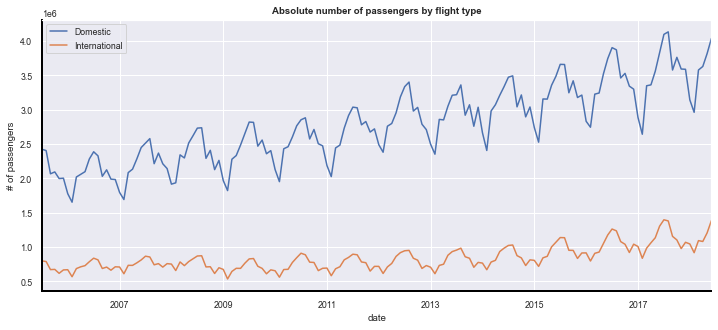

In [20]:
ts2=pax[pax['GEO Summary']=='Domestic'].groupby("Activity Period")['Passenger Count'].sum()
ts3=pax[pax['GEO Summary']=='International'].groupby("Activity Period")['Passenger Count'].sum()
ts=pd.concat([ts2,ts3],axis=1)
ts.columns=['Domestic','International']
ax=ts.plot(figsize=(12,5))
ax.set_title("Absolute number of passengers by flight type",fontweight='bold')
ax.set_xlabel("date")
ax.set_ylabel("# of passengers")



for loc in ['bottom','left']:
    ax.spines[loc].set_visible(True)
    ax.spines[loc].set_linewidth(2)
    ax.spines[loc].set_color('black')


ax.spines['right'].set_visible(True)
ax.spines['top'].set_visible(True)
plt.show()


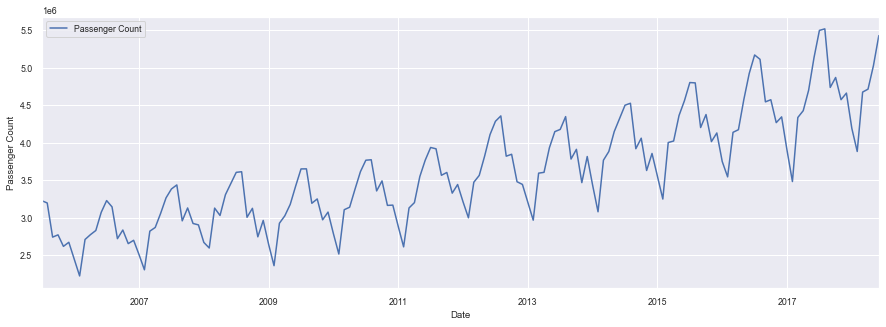

In [21]:
ts1=pax.groupby("Activity Period")['Passenger Count'].sum().to_frame()
fig,ax=plt.subplots(1,1,figsize=(15,5))
ts1.plot(ax=ax)
ax.set_xlabel("Date")
ax.set_ylabel("Passenger Count")
plt.grid(True)
plt.show()

In [22]:
# we apply Augmented Dickey-Fuller test for stationary check of time series. The null hypo is that time series is not stationary
# H0->if failed to be rejected means it is non-stationary
# H1-> if Ha is accepted low p-value, means the time series is stationary
# setting p-value to 0.05

In [23]:
from statsmodels.tsa.stattools import adfuller
results=adfuller(ts1['Passenger Count'])
print("ADF Statistic: %f" % results[0])
print('p-value: %f' %results[1])

# since p-value is >0.05, we have to make it stationary
# to better understand the time series , we will decompose it into 3 components
# trend,seasonality,residuals

ADF Statistic: 1.133106
p-value: 0.995489


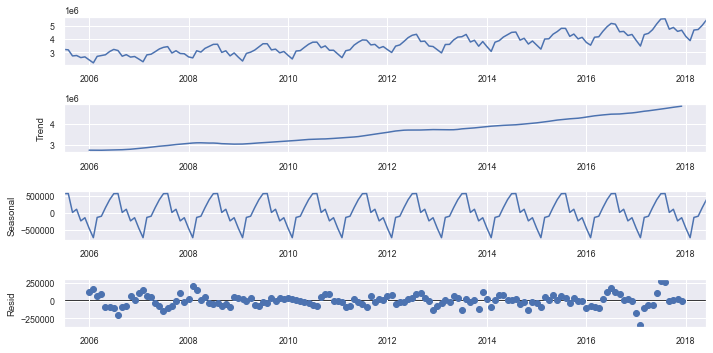

In [27]:
from statsmodels.tsa.seasonal import seasonal_decompose
plt.rcParams['figure.figsize']=10,5
# additive decomposition
decomposed_add=seasonal_decompose(ts1,model='additive')
add=decomposed_add.plot()
plt.show()

In [28]:
#The model seems to have a 12-month seasonal trend which makes sense as usually every year a holiday period is more busy at airports. In order to stationarize time series and to ARMA model I will transform this time series by taking the 1-month difference.

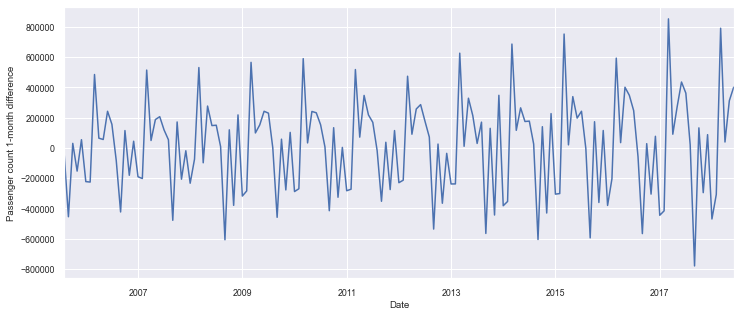

In [31]:
ts1_diff=ts1.diff().dropna()
plt.figure(figsize=(12,5))
ax=ts1_diff['Passenger Count'].plot()
ax.set_xlabel("Date")
ax.set_ylabel("Passenger count 1-month difference")
plt.grid(True)
plt.show()


In [32]:
results = adfuller(ts1_diff["Passenger Count"])
print('ADF Statistic: %f' % results[0])
print("P-value of a test is: {}".format(results[1]))

ADF Statistic: -2.950493
P-value of a test is: 0.039783614803845214


In [34]:
# the time series graph is stationary,we reject the null hypothesis
# the plot still shows a bit of seasonality
# have to be aware of overdifferencing time

In [35]:
results = adfuller(ts1.diff().diff().dropna()["Passenger Count"])
print('ADF Statistic: %f' % results[0])
print("P-value of a test is: {}".format(results[1]))


ADF Statistic: -5.647791
P-value of a test is: 1.002053447892465e-06


In [ ]:
#  get the understanding of acf and pacf------------------------------------------------

C:\Users\kusha\AppData\Roaming\Python\Python310\site-packages\statsmodels\graphics\tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker ('ywm'). You can use this method now by setting method='ywm'.
  warnings.warn(


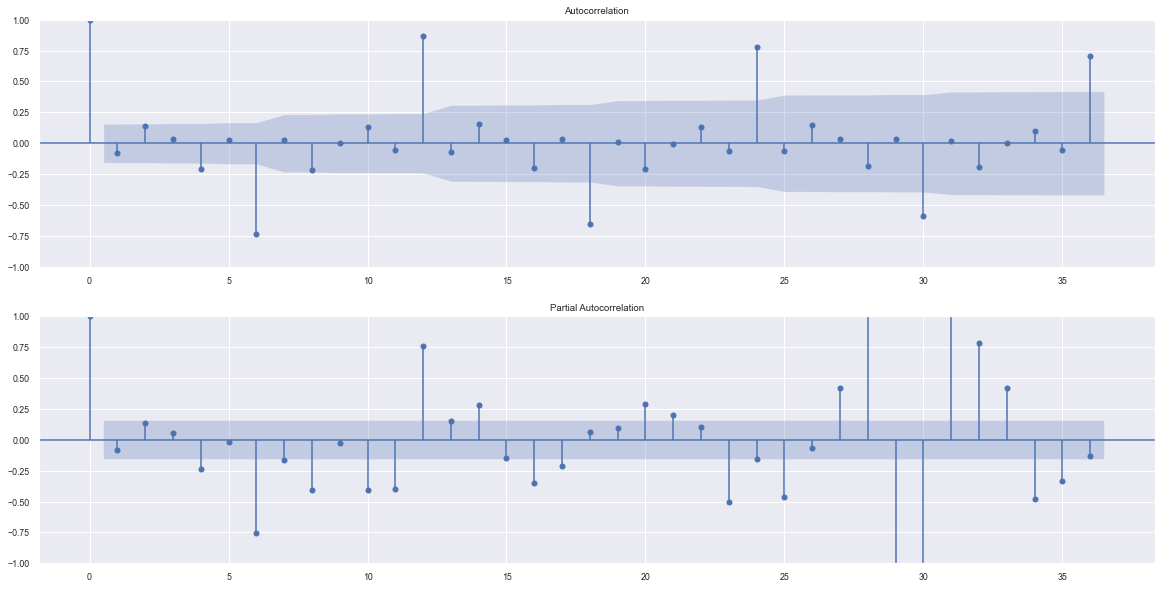

In [36]:
from pandas.plotting import autocorrelation_plot
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf

fig,ax=plt.subplots(2,1,figsize=(20,10))
plot_acf(ts1_diff,lags=36,ax=ax[0])
plot_pacf(ts1_diff,lags=36,ax=ax[1])
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2D array with a single row if you intend to specify the same RGB or RGBA value for all points.


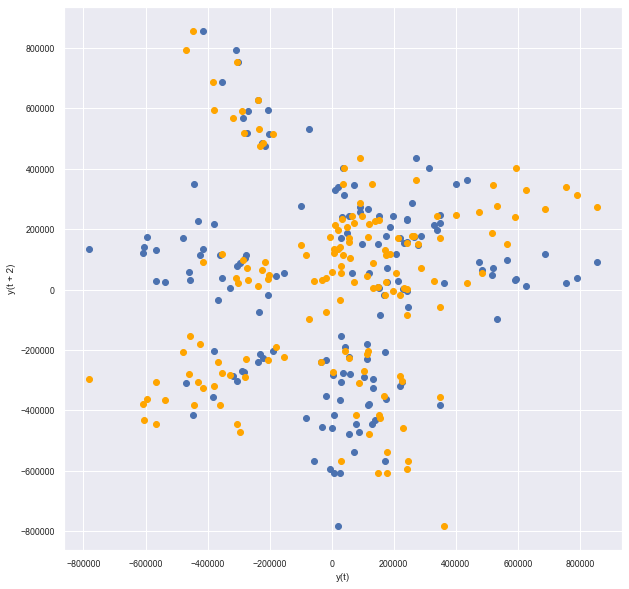

In [37]:
from pandas.plotting import lag_plot
fig,ax=plt.subplots(figsize=(10,10))
ax=lag_plot(ts1_diff,lag=1)
ax=lag_plot(ts1_diff,lag=2,c='orange')
plt.show()

In [39]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
ts1.index.freq=ts1.index.inferred_freq
model2=SARIMAX(ts1,order=(2,1,1),seasonal_order=(0,1,0,12))
results=model2.fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                     Passenger Count   No. Observations:                  156
Model:             SARIMAX(2, 1, 1)x(0, 1, [], 12)   Log Likelihood               -1842.014
Date:                             Sun, 31 Jul 2022   AIC                           3692.029
Time:                                     01:07:06   BIC                           3703.880
Sample:                                 07-01-2005   HQIC                          3696.844
                                      - 06-01-2018                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9479      0.025     37.976      0.000       0.899       0.997
ar.L2          0.0096      0.024      0.393      0.694      -0.038       0.057
ma.L1         -0.9998      0.092    -10.893      0.000      -1.180      -0.820
sigma2      8.149e+09   1.13e-11   7.23e+20      0.000    8.15e+09    8.15e+09
===================================================================================
Ljung-Box (L1) (Q):                  11.95   Jarque-Bera (JB):                 8.76
Prob(Q):                              0.00   Prob(JB):                         0.01
Heteroskedasticity (H):               1.04   Skew:                             0.32
Prob(H) (two-sided):                  0.89   Kurtosis:                         4.03
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 4.53e+35. Standard errors may be unstable.
"""

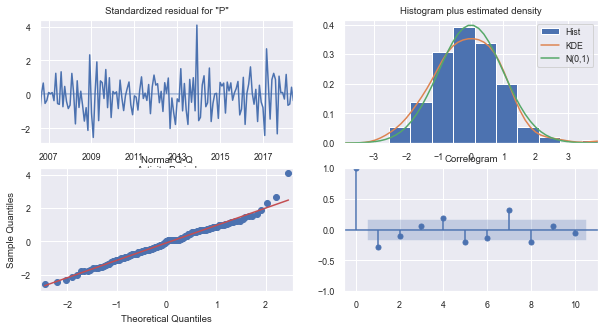

In [40]:
results.plot_diagnostics()
plt.show()

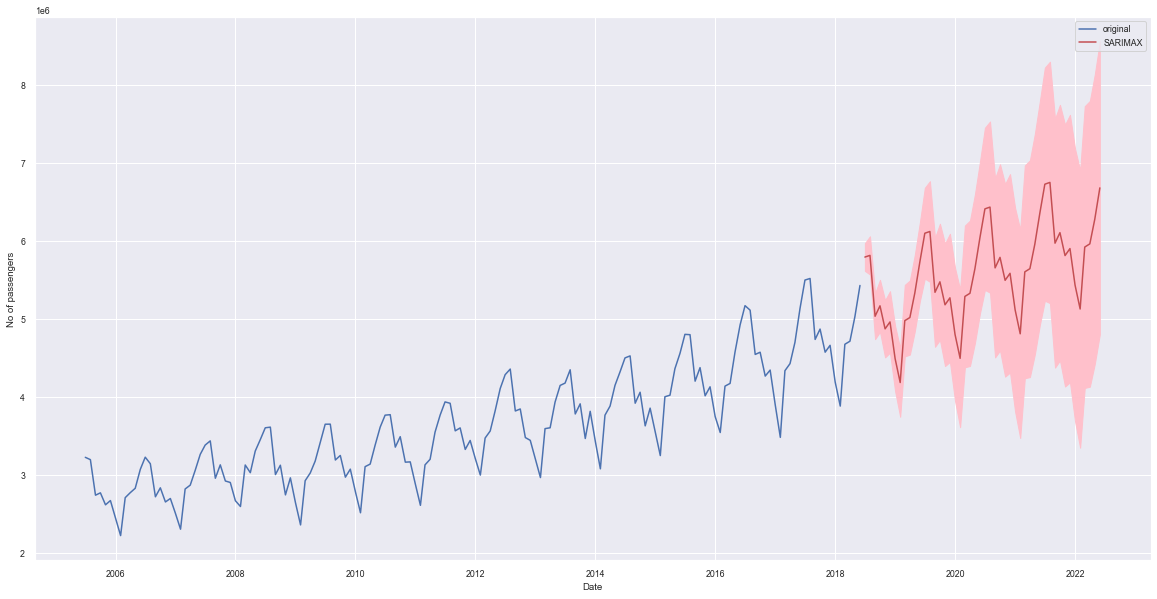

In [47]:
# creating sarima mean forecast

forecast=results.get_forecast(steps=48)
lower=forecast.conf_int()['lower Passenger Count']
upper=forecast.conf_int()['upper Passenger Count']
fix,ag=plt.subplots(1,1,figsize=(20,10))
plt.plot(ts1,label='original')
plt.plot(forecast.predicted_mean,label='SARIMAX',c='r')
plt.fill_between(forecast.conf_int().index,lower,upper,color='pink')

plt.xlabel("Date")
plt.ylabel("No of passengers")
plt.legend()
plt.show()

In [45]:
#The plot above shows predictions using SARIMAX(2,1,1)x(0,1,0,12). The red line indicates the mean and the pink area is bounded by 95% confidence intervals. According to this prediction in 2022 a number of passengers can reach 8 millions at the peak time.

In [54]:
#The plot above shows predictions using SARIMAX(2,1,1)x(0,1,0,12). The red line indicates the mean and the pink area is bounded by 95% confidence intervals. According to this prediction in 2022 a number of passengers can reach 8 millions at the peak time.

In [52]:
forecast 

In [48]:
print(lower)

2018-07-01    5.613754e+06
2018-08-01    5.567600e+06
2018-09-01    4.738729e+06
2018-10-01    4.833282e+06
2018-11-01    4.505700e+06
2018-12-01    4.566597e+06
2019-01-01    4.073163e+06
2019-02-01    3.744554e+06
2019-03-01    4.518340e+06
2019-04-01    4.541388e+06
2019-05-01    4.839370e+06
2019-06-01    5.227926e+06
2019-07-01    5.514976e+06
2019-08-01    5.474105e+06
2019-09-01    4.641546e+06
2019-10-01    4.729622e+06
2019-11-01    4.394675e+06
2019-12-01    4.448065e+06
2020-01-01    3.947307e+06
2020-02-01    3.611702e+06
2020-03-01    4.378880e+06
2020-04-01    4.395726e+06
2020-05-01    4.687909e+06
2020-06-01    5.071051e+06
2020-07-01    5.369714e+06
2020-08-01    5.334628e+06
2020-09-01    4.504876e+06
2020-10-01    4.594008e+06
2020-11-01    4.259043e+06
2020-12-01    4.311740e+06
2021-01-01    3.809861e+06
2021-02-01    3.472870e+06
2021-03-01    4.238500e+06
2021-04-01    4.253709e+06
2021-05-01    4.544214e+06
2021-06-01    4.925672e+06
2021-07-01    5.231325e+06
2

In [49]:
forecast.conf_int()

,lower Passenger Count,upper Passenger Count
2018-07-01,5.613754e+06,5.968449e+06
2018-08-01,5.567600e+06,6.057525e+06
2018-09-01,4.738729e+06,5.326922e+06
2018-10-01,4.833282e+06,5.499806e+06
2018-11-01,4.505700e+06,5.237454e+06
2018-12-01,4.566597e+06,5.354086e+06
2019-01-01,4.073163e+06,4.909091e+06
2019-02-01,3.744554e+06,4.623095e+06
2019-03-01,4.518340e+06,5.434710e+06
2019-04-01,4.541388e+06,5.491580e+06


In [53]:
# we can gridsearch the sarima model by tuning the autoregressive and seasonality components

In [55]:
# check for white noises

In [56]:
from random import gauss
from random import seed
from pandas import Series
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot as plt
%matplotlib inline


<class 'list'>
0      1.288185
1      1.449446
2      0.066336
3     -0.764544
4     -1.092173
         ...   
995    0.619316
996    0.395090
997   -0.602409
998   -0.240635
999    1.546682
Length: 1000, dtype: float64


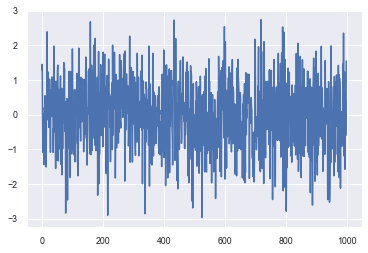

In [61]:
seed(1)

series=[gauss(0.0,1) for i in range(1000)]
print(type(series))
series=Series(series)
print(series)
series.plot()
plt.show()

In [60]:
print(series.describe())

count    1000.000000
mean       -0.013222
std         1.003685
min        -2.961214
25%        -0.684192
50%        -0.010934
75%         0.703915
max         2.737260
dtype: float64


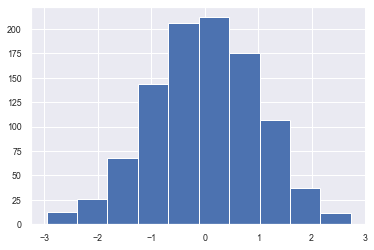

In [63]:
series.hist()
plt.show()

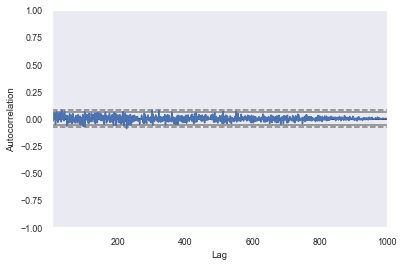

In [64]:
autocorrelation_plot(series)
plt.show()

In [65]:
# The correlogram does not show any obvious autocorrelation pattern.

# There are some spikes above the 95% and 99% confidence level, but these are a statistical fluke

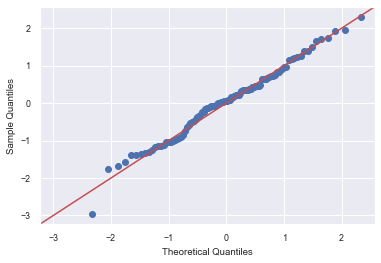

In [69]:
import numpy as np 
import statsmodels.api as sm 
import pylab as py 
  
# np.random generates different random numbers everytime the code is executed.
data_points = np.random.normal(0, 1, 100)     
  
sm.qqplot(data_points, line ='45') 
py.show()